# <font color=blue>Logistic Regression</font>

### step-01)Importing data

In [39]:
# --------importing required modules---------------
import pandas as pd
import numpy as np
from sklearn import datasets
data=datasets.load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [40]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [41]:
df=pd.DataFrame(data['data'])
df.columns=data['feature_names']
df['target']=data['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### step02) Data cleaning 
>1. missing values
>2. categorical varibale
>3. checking for consistency
>4. checking for datatype


#### 1. missing vaues

In [42]:
df.isna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [43]:
df.isna().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool

In [44]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

##### so there are no missing values and no deal with missing values

##### *2)categorical variables*

In [45]:
# ------checking for categorical varibales----
cat_vars=[ feature for feature in df.columns if df[feature].dtypes=='O']    # use capital 'o' only
cat_vars

[]

#####  No categorical variables are there so no deal with categorical varibales

##### 3). checking for consistency

In [46]:
descret_var=[feature for feature in df.columns if len(df[feature].unique())<10]
conti_var=[feature for feature in df.columns if feature not in cat_vars+descret_var]
print(descret_var)
print(conti_var)

['target']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


##### we can observe that only target  is descrete and all other variables are descrete so need not check for conistency and need not check for duplicates also


4). checking for datatype
> all varibales are float type

### step03). Exploratory data analysis
> 1. Data visualization
> 2. checking for outliers
> _if yes use 3 sigma technique to avoid those using data filtering
> 3. checking for balanca of data
> _ if found imbalance use over sampling or under sampling or combination based on dataset
> 4. Feature engineering (if required)
> _use min max scaler of standard scaler based on distribution of data
> 5. Feature selection
> _ use k best method  or any other technique to select feature 
> _ before that first see the multicoliniearity or not (however its assumption of linear regression)


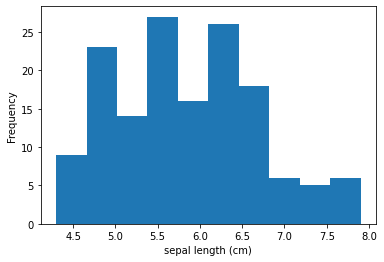

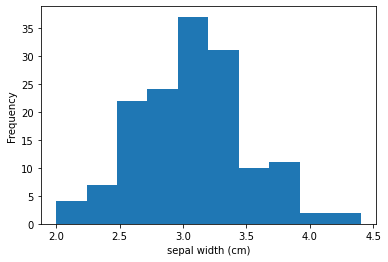

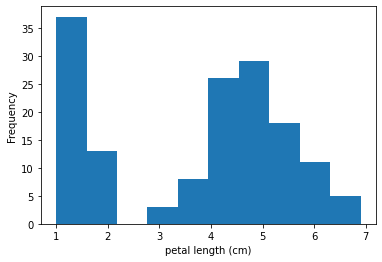

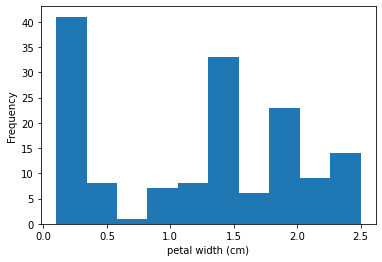

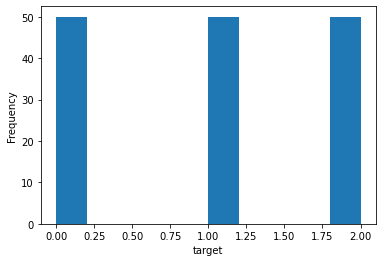

In [47]:
import matplotlib.pyplot as plt
for feature in df.columns:
    df[feature].plot.hist()
    plt.xlabel(feature)
    plt.show()
    

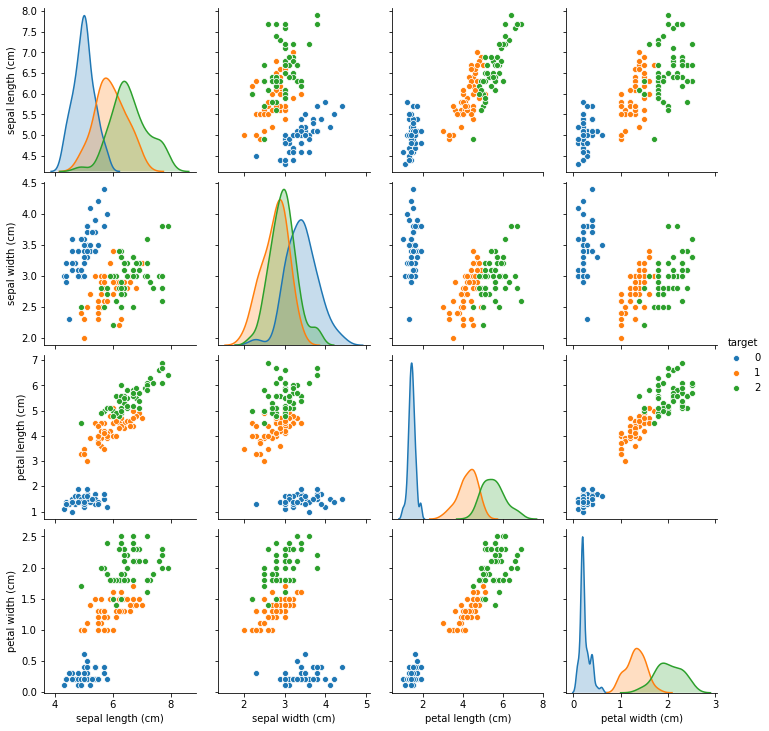

In [48]:
import seaborn as sns
sns.pairplot(df,hue='target')

##### We can observe that classes are overlapped and we know that its not good to use logistic regression here but we will apply it and co
and compare with the knn

##### Lets check the distribution of each expanatory variable using q-q plo

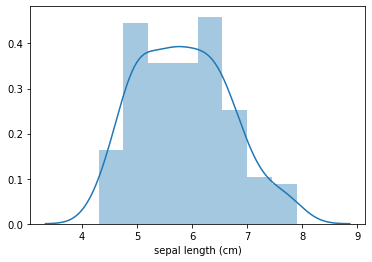

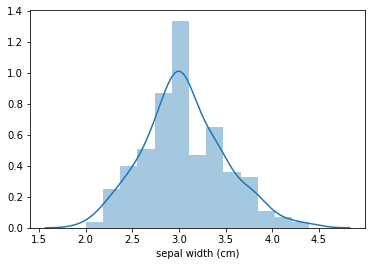

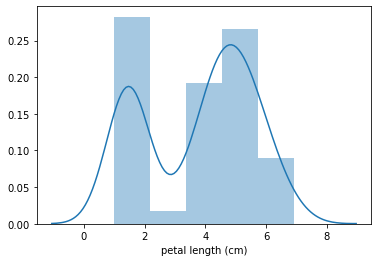

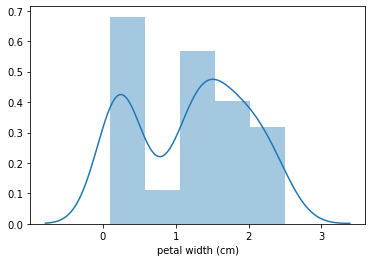

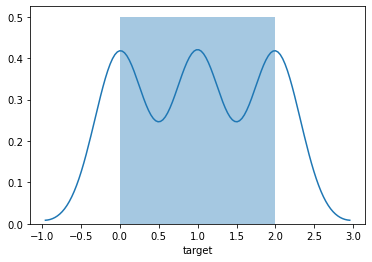

In [49]:
for feature in df.columns:
    sns.distplot(df[feature])
    plt.show()

##### we can observe that sepal lenght and petal lenght are near normal but petal lenght and petal width are not noramaly distributed
> we will check that using q-q plot

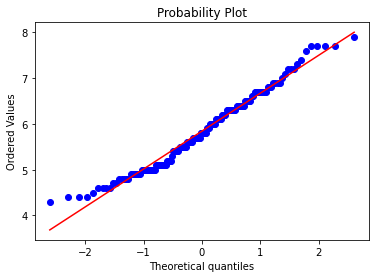

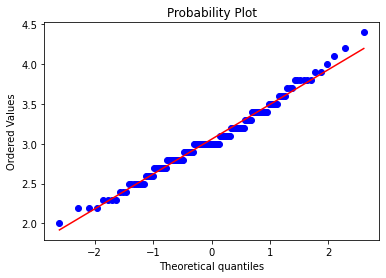

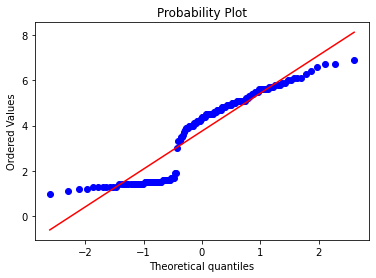

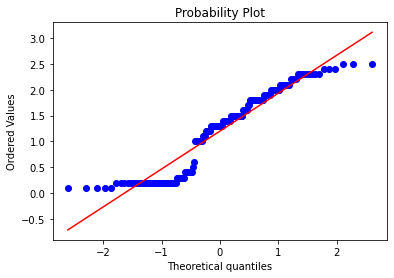

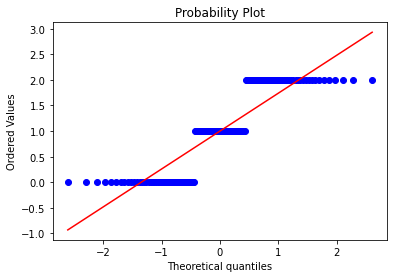

In [50]:
import numpy as np 
import pylab 
import scipy.stats as stats

# measurements = np.random.normal(loc = 20, scale = 5, size=100)   
# stats.probplot(measurements, dist="norm", plot=pylab)
# pylab.show()
for feature in df.columns:
    stats.probplot(df[feature],dist='norm',plot=pylab)
    pylab.show()

##### checking for outliesr

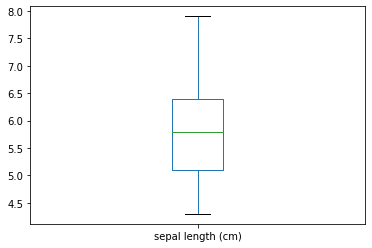

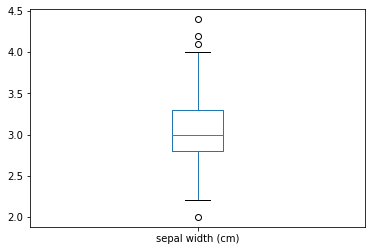

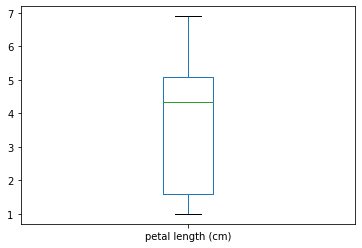

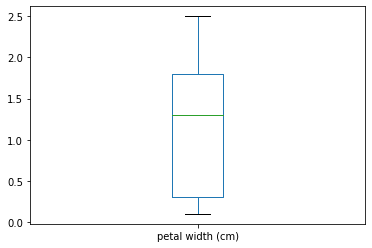

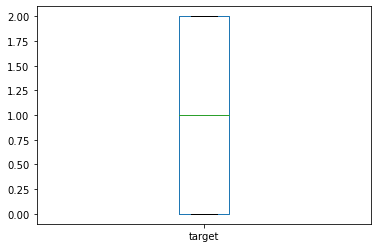

In [51]:
for feature in df.columns:
    df[feature].plot(kind='box')
    plt.show()

##### only sepel width contain outliers

In [52]:
# so we will try to avoid those outliers 
df.columns
one_sigma=df['sepal width (cm)'].std()
one_sigma

0.435866284936698

In [53]:
mu=df['sepal width (cm)'].mean()

In [54]:
three_sigma=3*one_sigma
lower=-(mu+three_sigma)
upper=mu+three_sigma
print(lower,upper)

-4.3649321881434275 4.3649321881434275


In [55]:
f_data=df[(df['sepal width (cm)']>lower) & (df['sepal width (cm)']<upper)]
f_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


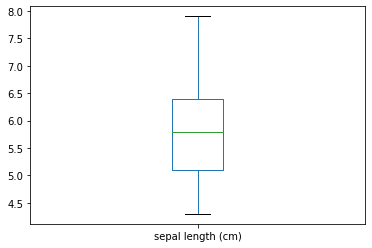

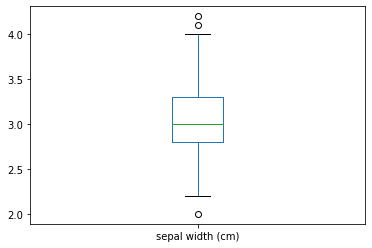

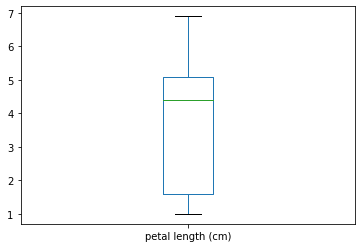

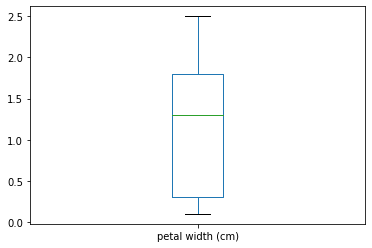

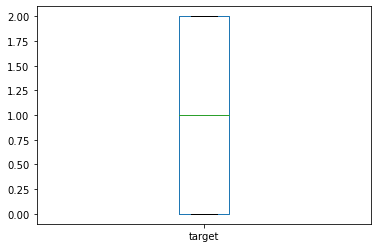

In [56]:
# Now again checking for outliers
for feature in f_data.columns:
    f_data[feature].plot(kind='box')
    plt.show()                    
                        

##### so we cal observe that one outlier is removed

##### <font color='red'> Checking for balance of dataset</font>

In [57]:
print(f_data['target'].unique())

[0 1 2]


In [58]:
zero=f_data[f_data['target']==0]['target'].count()
one=f_data[f_data['target']==1]['target'].count()
two=f_data[f_data['target']==2]['target'].count()

print('zero cataegory: {}\none category: {}\ntwo th category: {}'.format(zero,one,two))

zero cataegory: 49
one category: 50
two th category: 50


##### So it is balanced dataset

##### since logistic regression involve distance calculation feature engineering is required
> its good practice to do feature engineering after splitting the data to avoid data leakage

In [59]:
f_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [60]:
# ---------------------splitting data--------------------

y=f_data['target']
x=f_data.drop('target',axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

In [61]:
print(x_train)
print(y_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
89                 5.5               2.5                4.0               1.3
26                 5.0               3.4                1.6               0.4
139                6.9               3.1                5.4               2.1
30                 4.8               3.1                1.6               0.2
20                 5.4               3.4                1.7               0.2
..                 ...               ...                ...               ...
38                 4.4               3.0                1.3               0.2
88                 5.6               3.0                4.1               1.3
34                 4.9               3.1                1.5               0.2
60                 5.0               2.0                3.5               1.0
3                  4.6               3.1                1.5               0.2

[104 rows x 4 columns]
89     1
26     0
139    2
30     0
20  

In [62]:
# ---------------feature engineering--------------------
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_train=scale.fit_transform(x_train)                   # observe here transform is only for x_test
x_test=scale.transform(x_test)


In [63]:
print(x_train)
print(y_train)

[[0.33333333 0.22727273 0.5        0.5       ]
 [0.19444444 0.63636364 0.0862069  0.125     ]
 [0.72222222 0.5        0.74137931 0.83333333]
 [0.13888889 0.5        0.0862069  0.04166667]
 [0.30555556 0.63636364 0.10344828 0.04166667]
 [0.25       0.68181818 0.06896552 0.04166667]
 [0.08333333 0.54545455 0.05172414 0.04166667]
 [0.25       0.95454545 0.06896552 0.        ]
 [0.02777778 0.40909091 0.05172414 0.04166667]
 [0.66666667 0.45454545 0.70689655 0.91666667]
 [1.         0.81818182 0.9137931  0.79166667]
 [0.5        0.36363636 0.62068966 0.45833333]
 [0.16666667 0.45454545 0.05172414 0.04166667]
 [0.47222222 0.09090909 0.5        0.375     ]
 [0.77777778 0.45454545 0.82758621 0.83333333]
 [0.38888889 0.40909091 0.53448276 0.5       ]
 [0.33333333 0.18181818 0.46551724 0.41666667]
 [0.80555556 0.45454545 0.81034483 0.625     ]
 [0.58333333 0.5        0.75862069 0.70833333]
 [0.16666667 0.5        0.06896552 0.        ]
 [0.08333333 0.63636364 0.05172414 0.08333333]
 [0.80555556 

<font color='red'>now the data is ready to fit the model<\font>

### <font color='blue'>Fitting  the model</font>

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [65]:
reg=LogisticRegression()
onevsrest=OneVsRestClassifier(reg)
onevsrest.fit(x_train,y_train)
y_pred=onevsrest.predict(x_test)
round(onevsrest.score(x_test,y_test),2)

0.84

##### so model accuracy is 84% 

In [66]:



knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)
knn_y_pred=knn.predict(x_test)
knn_score=knn.score(x_test,y_test)
knn_score

0.9333333333333333

##### so model accuracy is 93.3% 

In [67]:
from sklearn.model_selection import cross_val_score
x=scale.fit_transform(x)

In [68]:
ovr=OneVsRestClassifier(reg)
cross_ovr=cross_val_score(ovr,x,y,cv=5)
print(cross_ovr)
max(cross_ovr)        #using this model is overfitting

[0.8        0.93333333 0.86666667 0.86666667 1.        ]


1.0

## <font color='blue'>performance evaluation</font>

#### logistic regression

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [70]:
confusion_matrix(y_test,y_pred)   #logreg

array([[15,  0,  0],
       [ 0, 10,  5],
       [ 0,  2, 13]], dtype=int64)

In [71]:
overall_accuracy=(15+10+13)/(15+10+13+2+5)
overall_accuracy

0.8444444444444444

In [72]:
print(classification_report(y_test,y_pred))    #logreg

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      0.67      0.74        15
           2       0.72      0.87      0.79        15

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45



In [73]:
import sklearn
sklearn.metrics.precision_score(y_test,y_pred)        # here we can see that precision and recall works only for binary classification

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [74]:
sklearn.metrics.precision_score(y_test,y_pred,average='macro')

0.851851851851852

In [75]:
sklearn.metrics.recall_score(y_test,y_pred,average='macro')

0.8444444444444444

## knn classifier 

In [76]:
knn_c_matrix=confusion_matrix(y_test,knn_y_pred)
knn_c_report=classification_report(y_test,knn_y_pred)
print(knn_c_matrix)

[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


In [77]:
print(knn_c_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [78]:
print(round(sklearn.metrics.precision_score(y_test,knn_y_pred,average='macro'),2))
print(round(sklearn.metrics.recall_score(y_test,knn_y_pred,average='macro'),2))

0.93
0.93


### <font color=red> Which model to be selected</font>

>Since knn classifiers performance is good for this dataset so we select knn classification model for this dataset